In [48]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_fontja
import separator
import noisereduce as nr
import soundfile as sf
import scipy.signal as signal


In [49]:
url = input("Enter the YouTube video URL: ")
file = separator.download_and_separate_audio(url)
NoRevarb_file = separator.revarb_remove(f"./separated_audio/{file}")
Noharmony_file = separator.harmony_remove(f"./separated_audio/{NoRevarb_file}")
output_file = separator.noize_remove(f"./separated_audio/{Noharmony_file}")

[youtube] Extracting URL: https://youtu.be/3S5Yu9HpE3I?si=2mN8sK7NmW7pEwFf
[youtube] 3S5Yu9HpE3I: Downloading webpage
[youtube] 3S5Yu9HpE3I: Downloading tv client config
[youtube] 3S5Yu9HpE3I: Downloading tv player API JSON
[youtube] 3S5Yu9HpE3I: Downloading ios player API JSON
[youtube] 3S5Yu9HpE3I: Downloading player e12fbea4-main


         player = https://www.youtube.com/s/player/e12fbea4/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 3S5Yu9HpE3I: Downloading m3u8 information
[info] Testing format 234
[info] 3S5Yu9HpE3I: Downloading 1 format(s): 234
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 43
[download] Destination: downloaded_audio\download.mp4
[download] 100% of    3.75MiB in 00:00:00 at 4.43MiB/s                   
[ExtractAudio] Destination: downloaded_audio\download.wav
Deleting original file downloaded_audio\download.mp4 (pass -k to keep)
[Metadata] Adding metadata to "downloaded_audio\download.wav"
[youtube] Extracting URL: https://youtu.be/3S5Yu9HpE3I?si=2mN8sK7NmW7pEwFf
[youtube] 3S5Yu9HpE3I: Downloading webpage
[youtube] 3S5Yu9HpE3I: Downloading tv client config
[youtube] 3S5Yu9HpE3I: Downloading tv player API JSON
[youtube] 3S5Yu9HpE3I: Downloading ios player API JSON


         player = https://www.youtube.com/s/player/e12fbea4/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 3S5Yu9HpE3I: Downloading m3u8 information
[info] Testing format 234


2025-07-03 02:03:27,257 - INFO - separator - Separator version 0.34.1 instantiating with output_dir: ./separated_audio, output_format: WAV
2025-07-03 02:03:27,258 - INFO - separator - Using model directory from model_file_dir parameter: /tmp/audio-separator-models/
2025-07-03 02:03:27,264 - INFO - separator - Operating System: Windows 10.0.22631
2025-07-03 02:03:27,264 - INFO - separator - System: Windows Node: Yuzuki_PC Release: 11 Machine: AMD64 Proc: Intel64 Family 6 Model 183 Stepping 1, GenuineIntel
2025-07-03 02:03:27,264 - INFO - separator - Python Version: 3.13.5
2025-07-03 02:03:27,265 - INFO - separator - PyTorch Version: 2.7.1+cu128
2025-07-03 02:03:27,283 - INFO - separator - FFmpeg installed: ffmpeg version 7.1.1-full_build-www.gyan.dev Copyright (c) 2000-2025 the FFmpeg developers
2025-07-03 02:03:27,285 - INFO - separator - ONNX Runtime GPU package installed with version: 1.22.0
2025-07-03 02:03:27,303 - INFO - separator - CUDA is available in Torch, setting Torch device

Downloaded audio for: 残酷な天使のテーゼ - 高橋洋子（フル）
残酷な天使のテーゼ_-_高橋洋子（フル）


2025-07-03 02:03:40,657 - INFO - mdxc_separator - MDXC Separator initialisation complete
2025-07-03 02:03:40,658 - INFO - separator - Load model duration: 00:00:13
2025-07-03 02:03:40,658 - INFO - separator - Processing file: ./downloaded_audio/download.wav
2025-07-03 02:03:40,658 - INFO - separator - Starting separation process for audio_file_path: ./downloaded_audio/download.wav
100%|██████████| 31/31 [00:18<00:00,  1.66it/s]
2025-07-03 02:04:01,647 - INFO - mdxc_separator - Saving other stem to download_(other)_vocals_mel_band_roformer.wav...
2025-07-03 02:04:01,816 - INFO - common_separator - Audio duration is 0.07 hours (241.19 seconds).
2025-07-03 02:04:01,816 - INFO - common_separator - Using pydub for writing.
2025-07-03 02:04:01,964 - INFO - mdxc_separator - Saving vocals stem to Vocals.wav...
2025-07-03 02:04:01,976 - INFO - common_separator - Audio duration is 0.07 hours (241.19 seconds).
2025-07-03 02:04:01,976 - INFO - common_separator - Using pydub for writing.
2025-07-03

In [50]:
file = './separated_audio/noize_removed.wav'
audio, sr = librosa.load(file)
normalized_audio = librosa.util.normalize(audio)
output_path = './separated_audio/final_output.wav'
sf.write(output_path, normalized_audio, sr)

audio, sr = librosa.load(output_path)

In [51]:
top_db = 30

fmin=librosa.note_to_hz('C1')
fmax=librosa.note_to_hz('C7')
frame_length = 2048
hop_length = frame_length // 4

intervals = librosa.effects.split(audio, top_db=top_db, frame_length=frame_length, hop_length=hop_length)

print(f"元の音声長: {librosa.get_duration(y=audio, sr=sr):.2f} 秒")
print(f"検出された有効な音声区間の数: {len(intervals)}")
for i, (start, end) in enumerate(intervals):
    print(f"  区間 {i}: {start/sr:.2f} 秒から {end/sr:.2f} 秒まで")

# --- 3. 各区間でピッチを推定し、結果を結合 ---
all_f0 = []
all_voiced_flags = []
all_voiced_probs = []

print("\n各区間でPYINを実行中...")

for start_i, end_i in intervals:
    # 区間ごとの音声データを切り出す
    y_interval = audio[start_i:end_i]
    
    # 区間ごとにPYINを実行
    f0, voiced_flag, voiced_prob = librosa.pyin(
        y_interval,
        fmin=fmin,
        fmax=fmax,
        sr=sr,
        frame_length=frame_length,
        hop_length=hop_length
    )
    
    # 結果をリストに追加
    all_f0.append(f0)
    all_voiced_flags.append(voiced_flag)
    all_voiced_probs.append(voiced_prob)
    print(f"  区間 {start_i/sr:.2f} 秒から {end_i/sr:.2f} 秒までのピッチ推定完了。")
    print("進捗: {:.2f}%".format((start_i / len(audio)) * 100))

# 全区間の結果を一つのNumpy配列に結合
if all_f0:
    f0_combined = np.concatenate(all_f0)
    voiced_flag_combined = np.concatenate(all_voiced_flags)
    voiced_prob_combined = np.concatenate(all_voiced_probs)
else:
    # 有効な区間が一つもなかった場合
    f0_combined, voiced_flag_combined, voiced_prob_combined = [], [], []

print("PYINの実行完了。")

元の音声長: 241.18 秒
検出された有効な音声区間の数: 11
  区間 0: 20.62 秒から 21.18 秒まで
  区間 1: 81.53 秒から 81.99 秒まで
  区間 2: 193.19 秒から 193.45 秒まで
  区間 3: 193.75 秒から 194.44 秒まで
  区間 4: 217.97 秒から 218.43 秒まで
  区間 5: 218.99 秒から 222.05 秒まで
  区間 6: 231.13 秒から 234.78 秒まで
  区間 7: 235.03 秒から 235.75 秒まで
  区間 8: 235.91 秒から 235.94 秒まで
  区間 9: 236.45 秒から 237.98 秒まで
  区間 10: 238.19 秒から 238.33 秒まで

各区間でPYINを実行中...
  区間 20.62 秒から 21.18 秒までのピッチ推定完了。
進捗: 8.55%
  区間 81.53 秒から 81.99 秒までのピッチ推定完了。
進捗: 33.80%
  区間 193.19 秒から 193.45 秒までのピッチ推定完了。
進捗: 80.10%
  区間 193.75 秒から 194.44 秒までのピッチ推定完了。
進捗: 80.33%
  区間 217.97 秒から 218.43 秒までのピッチ推定完了。
進捗: 90.38%
  区間 218.99 秒から 222.05 秒までのピッチ推定完了。
進捗: 90.80%
  区間 231.13 秒から 234.78 秒までのピッチ推定完了。
進捗: 95.84%
  区間 235.03 秒から 235.75 秒までのピッチ推定完了。
進捗: 97.45%
  区間 235.91 秒から 235.94 秒までのピッチ推定完了。
進捗: 97.82%
  区間 236.45 秒から 237.98 秒までのピッチ推定完了。
進捗: 98.04%
  区間 238.19 秒から 238.33 秒までのピッチ推定完了。
進捗: 98.76%
PYINの実行完了。


In [52]:
import math

def my_round_int(number):
    return int((number * 2 + 1) // 2)

def hz_to_midi(hz):
    midi = 12 * (math.log2(hz / 440)) + 69
    midi = my_round_int(midi)
    return midi

In [53]:
def midi_to_hz(midi):
    hz = 440 * (2 ** ((midi - 69) / 12))
    hz = my_round_int(hz)
    return hz

In [54]:
def midi_to_simplified_note_name(midi_number):
    if not 0 <= midi_number <= 127:
        return "N/A"

    note_names_base = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    note_index = int(midi_number % 12)
    base_note = note_names_base[note_index]
    print(note_index)

    if midi_number <= 20:
        return "lowlowlow" + base_note
    elif midi_number <= 32:
        return "lowlow" + base_note
    elif midi_number <= 44:
        return "low" + base_note
    elif midi_number <= 56:
        return "mid1" + base_note
    elif midi_number <= 68:
        return "mid2" + base_note
    elif midi_number <= 80:
        return "hi" + base_note
    elif midi_number <= 92:
        return "hihi" + base_note
    elif midi_number <= 104:
        return "hihihi" + base_note
    else:
        return "hihihihi" + base_note

In [55]:
import numpy as np
def z_score_remove_outliers(data):
    valid_indices = ~np.isnan(data)
    temp_f0 = data[valid_indices]
    print(temp_f0)
    # zスコア法を使用して外れ値を検出
    mean = np.mean(temp_f0)
    print(mean)
    std_dev = np.std(temp_f0)
    print(std_dev)
    
    temp_f0 = temp_f0[(temp_f0 >= mean - 2 * std_dev) & (temp_f0 <= mean + 2 * std_dev)]
    z_scores = (temp_f0 - mean) / std_dev
    print(z_scores)

    outliers = temp_f0[np.abs(z_scores) > 2]
    # nanを除外したデータを返す
    print(f"Removed {len(outliers)} outliers from the data.")
    print(temp_f0)
    return temp_f0

[323.96475278 323.96475278 325.8414615  327.72904189 132.33275397
 133.8703865  134.64588976 134.64588976 132.33275397 130.05935646
 129.31026969 127.82501457 124.9054872  130.05935646 131.57057339
 131.57057339 132.33275397 130.81278265 128.56549734 127.82501457
 125.62905732 126.35681905 119.26495573 118.57804013 118.57804013
 118.57804013 118.57804013 119.26495573 117.21605518 117.89508088
 120.65074777 127.08879666 125.62905732 466.16376152 468.86422072
 471.58032352 477.05982293 482.60299107 493.88330126 502.5162293
 511.30005826 520.23742585 523.2511306  517.24107876 505.4272762
 493.88330126 485.39868175 482.60299107 485.39868175 491.03874276
 499.62194879 502.5162293  511.30005826 493.88330126 471.58032352
 468.86422072 468.86422072 468.86422072 466.16376152 466.16376152
 466.16376152 466.16376152 466.16376152 466.16376152 468.86422072
 468.86422072 474.31216054 482.60299107 488.21056771 491.03874276
 491.03874276 488.21056771 479.82340237 474.31216054 471.58032352
 471.5803235

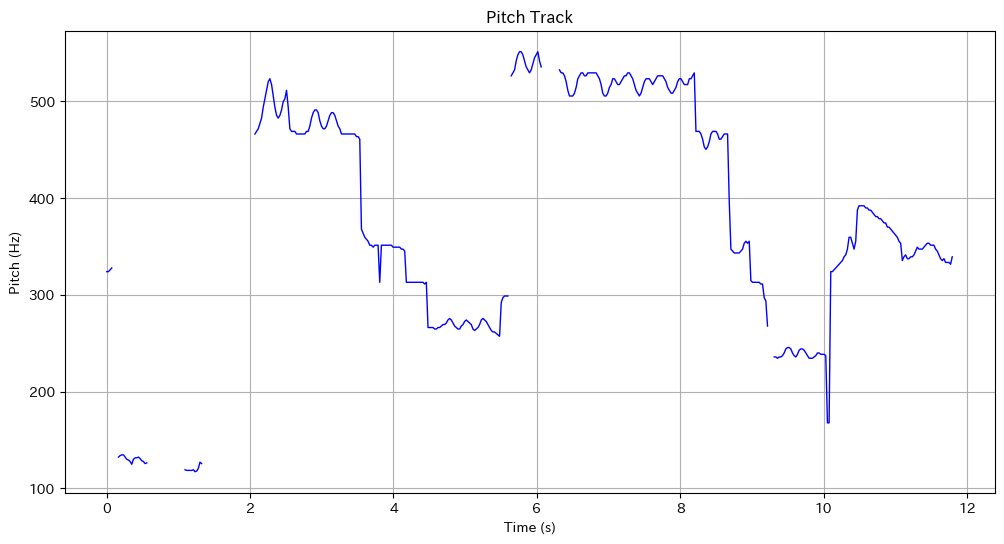

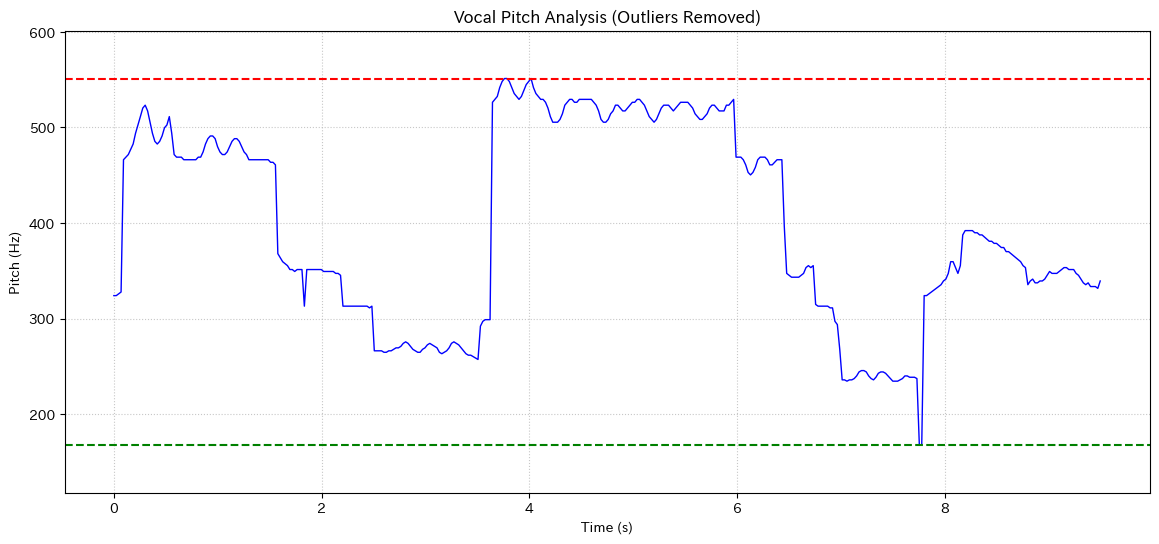

In [56]:
times = librosa.times_like(f0_combined, sr=sr)
plt.figure(figsize=(12, 6))
plt.plot(times, f0_combined, label='Pitch (Hz)', color='blue', linewidth=1)
plt.title('Pitch Track')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.grid()
plt.plot()

F0_cleaned = z_score_remove_outliers(f0_combined)

max_hz = np.max(F0_cleaned)
min_hz = np.min(F0_cleaned)
print(f"Max Frequency: {max_hz} Hz, Min Frequency: {min_hz} Hz")
max_midi = hz_to_midi(max_hz)
min_midi = hz_to_midi(min_hz)
max_note = midi_to_simplified_note_name(max_midi)
min_note = midi_to_simplified_note_name(min_midi)


print(f"Max MIDI: {max_midi}, Min MIDI: {min_midi}")
print(f"Max Note: {max_note}, Min Note: {min_note}")

F0_times = librosa.times_like(F0_cleaned, sr=sr)

plt.figure(figsize=(14, 6))
plt.plot(F0_times, F0_cleaned, label='Pitch (Hz) - Cleaned', color='blue', linewidth=1)
plt.axhline(y=max_hz, color='red', linestyle='--', label=f'MID Max Pitch: {max_note} ({max_hz:.2f} Hz)')
plt.axhline(y=min_hz, color='green', linestyle='--', label=f'MID Min Pitch: {min_note} ({min_hz:.2f} Hz)')
plt.ylim([min_hz - 50, max_hz + 50])
plt.title('Vocal Pitch Analysis (Outliers Removed)')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

1
4


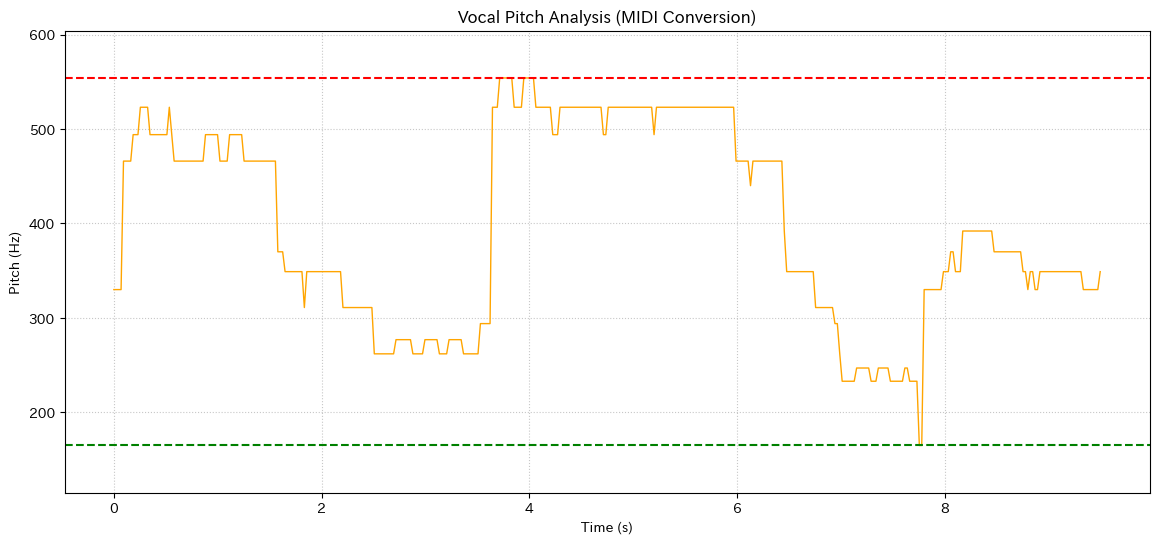

Max Frequency: 554 Hz, Min Frequency: 165 Hz
Max MIDI: 73, Min MIDI: 52
Max Note: hiC#, Min Note: mid1E


In [57]:
# 帰ってきた結果のhzをmidiナンバーに変換
f0_midi = [hz_to_midi(f) if f is not None else None for f in F0_cleaned]
# midiナンバーをhzに変換
f0_hz = [midi_to_hz(m) if m is not None else None for m in f0_midi]

max_hz = np.max(f0_hz)
min_hz = np.min(f0_hz)
max_midi = hz_to_midi(max_hz)
min_midi = hz_to_midi(min_hz)
max_note = midi_to_simplified_note_name(max_midi)
min_note = midi_to_simplified_note_name(min_midi)

# グラフの描画
plt.figure(figsize=(14, 6))
plt.plot(F0_times, f0_hz, label='Pitch (Hz) - MIDI', color='orange', linewidth=1)
plt.axhline(y=max_hz, color='red', linestyle='--', label=f'MID Max Pitch: {max_note} ({max_hz:.2f} Hz)')
plt.axhline(y=min_hz, color='green', linestyle='--', label=f'MID Min Pitch: {min_note} ({min_hz:.2f} Hz)')
plt.ylim([min_hz - 50, max_hz + 50])
plt.title('Vocal Pitch Analysis (MIDI Conversion)')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

print(f"Max Frequency: {max_hz} Hz, Min Frequency: {min_hz} Hz")
print(f"Max MIDI: {max_midi}, Min MIDI: {min_midi}")
print(f"Max Note: {max_note}, Min Note: {min_note}")

In [58]:
import re

def note_name_to_midi(note_name):
    """
    hi/mid/low形式の音名をMIDIノートナンバーに変換する関数
    (例: "mid2C" -> 60, "hiA#" -> 82)
    """
    note_name = note_name.lower().strip()
    
    # マッピング辞書
    note_map = {"c": 0, "c#": 1, "d": 2, "d#": 3, "e": 4, "f": 5, "f#": 6, "g": 7, "g#": 8, "a": 9, "a#": 10, "b": 11}
    # オクターブのプレフィックスと、そのオクターブ番号（C4=Octave 4）のマッピング
    octave_prefix_map = {
        "lowlowlow": 0, "lowlow": 1, "low": 2, 
        "mid1": 3, "mid2": 4, "hi": 5, 
        "hihi": 6, "hihihi": 7, "hihihihi": 8
    }

    # 正規表現でプレフィックスとノート部分を分離
    match = re.match(r"([a-z]+)([a-z]#?)", note_name)
    if not match:
        return None

    prefix, note_part = match.groups()

    if prefix in octave_prefix_map and note_part in note_map:
        octave_val = octave_prefix_map[prefix]
        note_val = note_map[note_part]
        
        # MIDIナンバーを計算 (C4 = 60 のため、オクターブ番号+1)
        midi_number = (octave_val + 1) * 12 + note_val
        return midi_number
    else:
        return None

In [ ]:
import re

note_prefix = {
    "c" : 0,
    "c#": 1,
    "d": 2,
    "d#": 3,
    "e": 4,
    "f": 5,
    "f#": 6,
    "g": 7,
    "g#": 8,
    "a": 9,
    "a#": 10,
    "b": 11
}

octave_prefix = {
    "lowlowlow": 0,
    "lowlow": 1,
    "low": 2,
    "mid1": 3,
    "mid2": 4,
    "hi": 5,
    "hihi": 6,
    "hihihi": 7,
    "hihihihi": 8
}

note_name = note_name.lower().strip()

match = re.match(r"([a-z,0-9]+)([a-z]#?)", note_name)

octave, note = match.groups()
if octave in octave_prefix and note in note_prefix:
    octave_val = octave_prefix[octave]
    note_val = note_prefix[note]

    if not note_val >= 9:
        midi_number = (octave_val + 1) * 12 + note_val
    else:
        midi_number = (octave_val * 12) + note_val

hi a
5 9
MIDI Number: 69


In [62]:
import re

def note_name_to_midi(note_name):

    note_name = note_name.lower().strip()

    note_prefix = {
        "c" : 0,
        "c#": 1,
        "d": 2,
        "d#": 3,
        "e": 4,
        "f": 5,
        "f#": 6,
        "g": 7,
        "g#": 8,
        "a": 9,
        "a#": 10,
        "b": 11
    }

    octave_prefix = {
        "lowlowlow": 0,
        "lowlow": 1,
        "low": 2,
        "mid1": 3,
        "mid2": 4,
        "hi": 5,
        "hihi": 6,
        "hihihi": 7,
        "hihihihi": 8
    }

    match = re.match(r"([a-z,0-9]+)([a-z]#?)", note_name)
    if not match:
        return None

    octave, note = match.groups()

    if octave in octave_prefix and note in note_prefix:
        octave_val = octave_prefix[octave]
        note_val = note_prefix[note]

        if not note_val >= 9:
            midi_number = (octave_val + 1) * 12 + note_val
            return midi_number
        elif note_val >= 9:
            midi_number = (octave_val * 12) + note_val
            return midi_number
        else:
            return None

In [63]:
# --- 1. あなたの音域を入力 ---
print("あなたが楽に出せる声の音域を入力してください (例: hiC, lowG#, mid2F)")
user_highest_note_str = input("あなたの最高音: ")
user_lowest_note_str = input("あなたの最低音: ")

user_max_midi = note_name_to_midi(user_highest_note_str)
user_min_midi = note_name_to_midi(user_lowest_note_str)

if user_max_midi is None or user_min_midi is None:
    print("\nエラー: 音名が正しく認識できませんでした。")
else:
    # --- 2. 既存の分析結果を使用 ---
    # 前のセルで計算済みの max_midi と min_midi を使用します
    song_max_midi = max_midi
    song_min_midi = min_midi

    # --- 3. 最適なキーを計算 ---
    # それぞれの音域の中心点を計算
    song_midpoint = (song_max_midi + song_min_midi) / 2
    user_midpoint = (user_max_midi + user_min_midi) / 2
    
    # 中心点を合わせるためのキーの差を計算（最も近い整数に丸める）
    key_shift = round(user_midpoint - song_midpoint)
    
    # 調整後の音域を計算
    adjusted_max_midi = song_max_midi + key_shift
    adjusted_min_midi = song_min_midi + key_shift
    
    # --- 4. 結果を表示 ---
    print("\n" + "="*40)
    print("           カラオケキー提案結果")
    print("="*40)
    
    print(f"原曲の音域: {midi_to_simplified_note_name(song_min_midi)} 〜 {midi_to_simplified_note_name(song_max_midi)}")
    print(f"あなたの音域: {midi_to_simplified_note_name(user_min_midi)} 〜 {midi_to_simplified_note_name(user_max_midi)}")
    
    print("\n" + "-"*40)
    print(f"おすすめのキーは【{key_shift:+}】です。")
    print("-" * 40)
    
    print(f"\nキーを【{key_shift:+}】にすると、曲の音域はこうなります↓")
    print(f"調整後の音域: {midi_to_simplified_note_name(adjusted_min_midi)} 〜 {midi_to_simplified_note_name(adjusted_max_midi)}")
    
    # ユーザーの音域に収まっているかチェック
    if adjusted_max_midi <= user_max_midi and adjusted_min_midi >= user_min_midi:
        print("このキーなら、あなたの音域に収まり無理なく歌えるでしょう")
    else:
        print("この曲は音域が広いため、あなたの音域を超える可能性があります")
        
    print("\n" + "="*40)

あなたが楽に出せる声の音域を入力してください (例: hiC, lowG#, mid2F)

           カラオケキー提案結果
4
1
原曲の音域: mid1E 〜 hiC#
5
9
あなたの音域: lowF 〜 hiA

----------------------------------------
おすすめのキーは【-8】です。
----------------------------------------

キーを【-8】にすると、曲の音域はこうなります↓
8
5
調整後の音域: lowG# 〜 mid2F
このキーなら、あなたの音域に収まり無理なく歌えるでしょう



max hiA min mid1A#
max mid2G min lowE
max mid2F# min lowF#